In [16]:
import pandas as pd 

df1 = pd.read_csv("complete.csv")
df2 = pd.read_csv("output_new.csv")

In [17]:
df1

,Unnamed: 0,Unnamed: 0.1,username1,username2,link1,link2,type,ssim,features2d,stage,link1_change,link2_change,ssim_exp,group,Unnamed: 0.1.1,ssim_exp_scale,dist_search
0,11,182,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/AkaGar/webapp...,http://www.ironhacks.com/preview/AkaGar/webapp...,complete,36.5,39.2,1,AkaGar,AkaGar,63.5,3,NaN,NaN,0.635
1,12,213,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/CampbellC2/we...,http://www.ironhacks.com/preview/CampbellC2/we...,complete,47.1,100.0,1,CampbellC2,CampbellC2,52.9,3,NaN,NaN,0.529
2,13,244,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/GeoffYart/web...,http://www.ironhacks.com/preview/GeoffYart/web...,complete,23.8,90.3,1,GeoffYart,GeoffYart,76.2,3,NaN,NaN,0.762
3,14,275,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/Ilyumzhinov/w...,http://www.ironhacks.com/preview/Ilyumzhinov/w...,complete,50.0,100.0,1,Ilyumzhinov,Ilyumzhinov,50.0,3,NaN,NaN,0.500
4,15,306,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/Jordan-Loeser...,http://www.ironhacks.com/preview/Jordan-Loeser...,complete,95.7,95.4,1,Jordan-Loeser,Jordan-Loeser,4.3,3,NaN,NaN,0.043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,426,241,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/sanjitsama/we...,http://www.ironhacks.com/preview/sanjitsama/we...,complete,45.6,100.0,4,sanjitsama,sanjitsama,54.4,0,6599.0,0.544,0.544
507,427,242,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/shivans/webap...,http://www.ironhacks.com/preview/shivans/webap...,complete,100.0,100.0,4,shivans,shivans,0.0,0,6623.0,0.000,0.010
508,428,243,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/snugghash/web...,http://www.ironhacks.com/preview/snugghash/web...,complete,25.2,100.0,4,snugghash,snugghash,74.8,0,6647.0,0.748,0.748
509,429,244,www.ironhacks.com,www.ironhacks.com,http://www.ironhacks.com/preview/viswapurdue/w...,http://www.ironhacks.com/preview/viswapurdue/w...,complete,99.9,100.0,4,viswapurdue,viswapurdue,0.1,0,6671.0,0.001,0.001


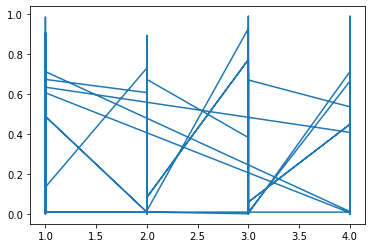

In [44]:
import matplotlib.pyplot as plt
from hmmlearn import hmm
plt.plot(df1["stage"], df1["dist_search"])

In [71]:
X = df1[["dist_search"]].values
# Build the HMM model and fit to the good price change data.
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)
print("Unique states:")
print(states)
print("\nStart probabilities:")
print(model.startprob_)
print("\nTransition matrix:")
print(model.transmat_)
print("\nGaussian distribution means:")
print(model.means_)
print("\nGaussian distribution covariances:")
print(model.covars_)

Unique states:
[0 1]

Start probabilities:
[1. 0.]

Transition matrix:
[[0.65068137 0.34931863]
 [0.56514293 0.43485707]]

Gaussian distribution means:
[[0.47666537]
 [0.00924504]]

Gaussian distribution covariances:
[[[6.51621320e-02]]

 [[6.36061411e-05]]]


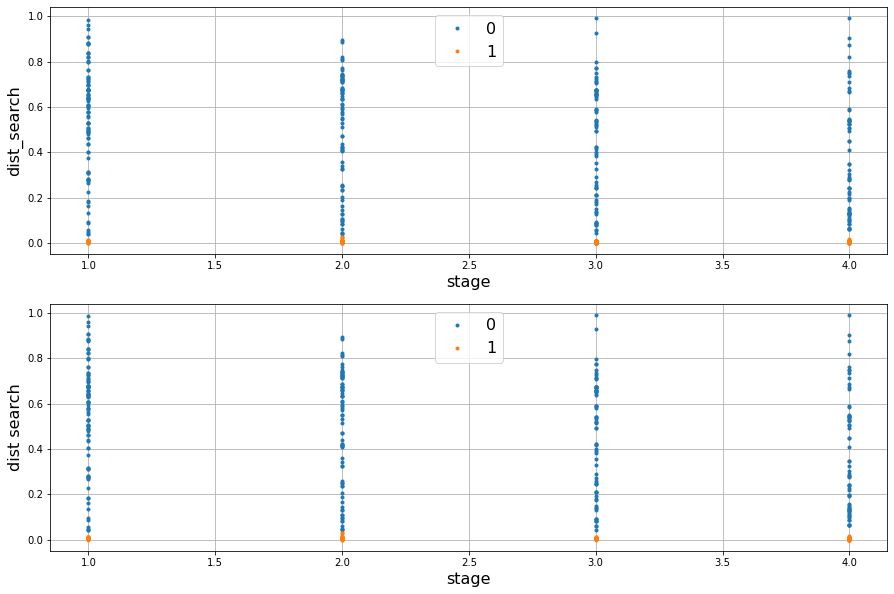

In [72]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = df1["stage"].iloc[want]
    y = df1["dist_search"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("stage", fontsize=16)
plt.ylabel("dist_search", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = df1["stage"].iloc[want]
    y = df1["dist_search"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("stage", fontsize=16)
plt.ylabel("dist search", fontsize=16)
plt.show()

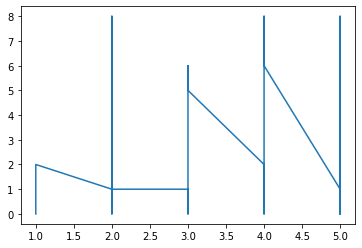

In [20]:
import matplotlib.pyplot as plt
from hmmlearn import hmm
plt.plot(df2["phase"], df2["len_40"])

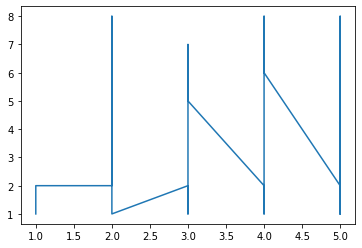

In [33]:
plt.plot(df2["phase"], df2["len_data"])

In [73]:
X = df2[["len_40"]].values
# Build the HMM model and fit to the gold price change data.
model = hmm.GaussianHMM(n_components = 3, covariance_type = "diag", n_iter = 50, random_state = 42)
model.fit(X)
# Predict the hidden states corresponding to observed X.
Z = model.predict(X)
states = pd.unique(Z)
print("Unique states:")
print(states)
print("\nStart probabilities:")
print(model.startprob_)
print("\nTransition matrix:")
print(model.transmat_)
print("\nGaussian distribution means:")
print(model.means_)
print("\nGaussian distribution covariances:")
print(model.covars_)

Unique states:
[2 0 1]

Start probabilities:
[9.68914107e-61 1.21264746e-43 1.00000000e+00]

Transition matrix:
[[9.03680850e-02 9.03202788e-01 6.42912662e-03]
 [2.71937520e-01 6.91126533e-04 7.27371353e-01]
 [2.80038655e-01 1.14039467e-01 6.05921878e-01]]

Gaussian distribution means:
[[2.35166145]
 [4.27910283]
 [0.52300698]]

Gaussian distribution covariances:
[[[1.4626058 ]]

 [[3.74658187]]

 [[0.32436767]]]


We find that the model does indeed return 3 unique hidden states. These numbers do not have any intrinsic meaning —which state corresponds to which volatility regime must be confirmed by looking at the model parameters. We find that for this particular data set, the model does not start in state 0. The transition matrix for the 3 hidden states show that the diagonal elements are large compared to the off diagonal elements. This means that the model tends to want to remain in that particular state it is in — the probability of transitioning up or down is not high. Finally, we take a look at the Gaussian emission parameters. Remember that each observable is drawn from a multivariate Gaussian distribution. Plotting the model’s state predictions with the data, we find that the states 2, 0 and 1 appear to correspond to medium volatility, high volatility and low volatility.

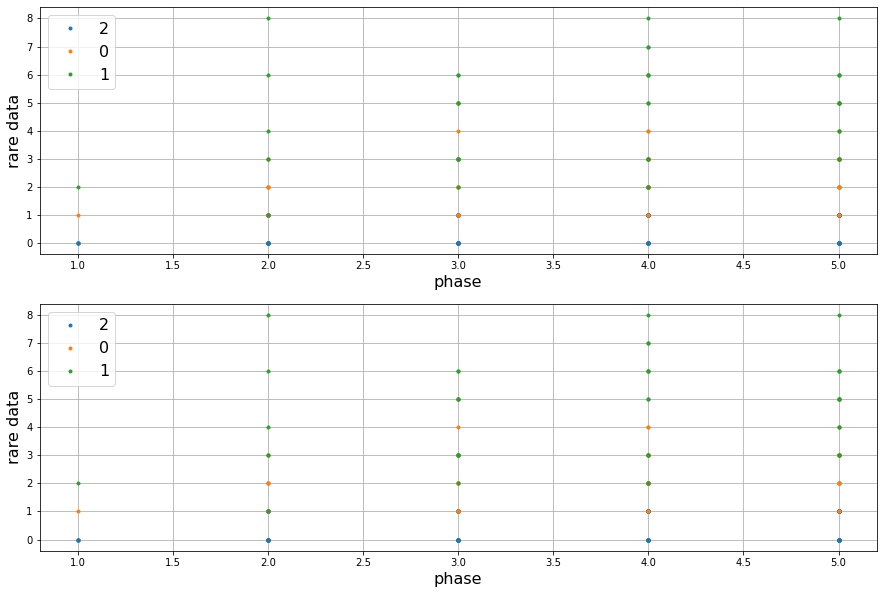

In [74]:
plt.figure(figsize = (15, 10))
plt.subplot(2,1,1)
for i in states:
    want = (Z == i)
    x = df2["phase"].iloc[want]
    y = df2["len_40"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("phase", fontsize=16)
plt.ylabel("rare data", fontsize=16)
plt.subplot(2,1,2)
for i in states:
    want = (Z == i)
    x = df2["phase"].iloc[want]
    y = df2["len_40"].iloc[want]
    plt.plot(x, y, '.')
plt.legend(states, fontsize=16)
plt.grid(True)
plt.xlabel("phase", fontsize=16)
plt.ylabel("rare data", fontsize=16)
plt.show()


In [40]:
new_df = pd.merge(df2, df1,  how='left', left_on=['username','stage'], right_on = ['link1_change','stage'])
new_df

KeyError: 'stage'

In [12]:
from scipy.stats import pearsonr
new_df = new_df[new_df['dist_search'].notna()]
pearsonr(new_df['len_data'], new_df['dist_search'])

(0.010891929721984411, 0.8774265063950284)